In [140]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings

warnings.filterwarnings("ignore")

In [141]:
# Load datasets
table = pd.read_csv('../scraping/tables/variable_data_1.csv')
laliga = pd.read_csv('../scraping/tables/laliga/laliga_all_seasons.csv', index_col=0)
# laliga = pd.read_csv('../scraping/tables/premier/premier_all_seasons.csv', index_col=0)

# Set column names for `laliga` from the first row of `table` (excluding the first column)
laliga.columns = table.iloc[0, 1:]

# Get columns to keep based on the second row of `table`
columns_to_keep = table.T.loc[table.iloc[1] == '1'].iloc[:, 0]

# Remove duplicate columns and keep only the desired ones
laliga = laliga.loc[:, ~laliga.columns.duplicated() & laliga.columns.isin(columns_to_keep)]

# Reorder columns: move key identifiers to the front
columns_to_front = ['season_id', 'match_id', 'team_name', 'team_id']
laliga = laliga[columns_to_front + [col for col in laliga.columns if col not in columns_to_front]]

# Split the position and save the 1st one
laliga['Position'] = laliga['Position'].str.split(',').str[0].str.strip()
# Resulting DataFrame
laliga

,season_id,match_id,team_name,team_id,Player Name,Shirt Number,Nationality,Position,Age at Season Start,Minutes Played,...,Aerial Duels Won,Shots on Target Against,Goals Against,Saves,Save Percentage,Post-Shot Expected Goals (PSxG),Opponent Crosses Faced,Crosses Stopped,Crosses Stopped Percentage,Defensive Actions Outside Penalty Area
0,1,1,Almería,H,Adri Embarba,10.0,es ESP,LW,31-096,90,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Almería,H,Alejandro Pozo Pozo,17.0,es ESP,RB,24-170,65,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,Almería,H,Diego Mariño,1.0,es ESP,GK,33-094,90,...,0,4.0,2.0,2.0,100.0,2.1,6.0,0.0,0.0,2.0
3,1,1,Almería,H,Dion Lopy,6.0,sn SEN,CM,21-190,13,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,Almería,H,Gonzalo Melero,11.0,es ESP,CM,29-221,14,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,7,380,Real Sociedad,A,Raúl Navas,22.0,es ESP,CB,30-009,90,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79171,7,380,Real Sociedad,A,Sergio Canales,16.0,es ESP,RW,27-093,28,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79172,7,380,Real Sociedad,A,Willian José,12.0,br BRA,FW,26-178,90,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79173,7,380,Real Sociedad,A,Xabi Prieto,10.0,es ESP,DM,34-264,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
laliga.columns[10:-1]

Index(['Goals Scored', 'Assists Provided', 'Penalty Kicks Made', 'Total Shots',
       'Shots on Target', 'Red Cards', 'Interceptions Made',
       'Non-Penalty Expected Goals (npxG)', 'Shot-Creating Actions',
       'Goal-Creating Actions', 'Progressive Passes', 'Take-Ons Attempted',
       'Successful Take-Ons', 'Total Passes Completed',
       'Total Passes Attempted', 'Expected Assists (xA)',
       'Key Passes (Leading to Shots)', 'Passes into Penalty Area',
       'Crosses into Penalty Area', 'Through Balls Completed',
       'Passes Offside', 'Tackles Won', 'Tackles in Defensive Third',
       'Tackles in Middle Third', 'Tackles in Attacking Third',
       'Shots Blocked', 'Clearances Made', 'Errors Leading to Opponent Shots',
       'Live-Ball Touches', 'Progressive Carrying Distance (Yards)',
       'Carries into Final Third', 'Carries into Penalty Area',
       'Progressive Passes Received', 'Second Yellow Cards',
       'Offsides Committed', 'Penalty Kicks Won', 'Penalty Kic

In [143]:
w2 = pd.read_csv("../scraping/tables/variable_data.csv")
w2
w2 = w2.transpose()
w2

columns_to_keep = w2[w2[1]=='1'].reset_index()
columns_to_keep = columns_to_keep.iloc[:,1:6]

columns_to_keep.set_index(0)
columns_to_keep.drop(1, axis=1, inplace=True)
columns_to_keep.columns = ["name","def", "mid", "off"]
w2 = columns_to_keep
w2 = w2.dropna()

w2["def"] = w2["def"].astype(int)
w2["mid"] = w2["mid"].astype(int)
w2["off"] = w2["off"].astype(int)

w2["def_w"] = w2["def"] / w2["def"].sum()
w2["mid_w"] = w2["mid"] / w2["mid"].sum()
w2["off_w"] = w2["off"] / w2["off"].sum()

w = {
    row['name']: {
        'def': row['def_w'],
        'mid': row['mid_w'],
        'off': row['off_w']
    }
    for _, row in w2.iterrows()
}

w

{'Goals Scored': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Assists Provided': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Penalty Kicks Made': {'def': 0.014925373134328358,
  'mid': 0.012195121951219513,
  'off': 0.01282051282051282},
 'Total Shots': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Shots on Target': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.014925373134328358,
  'mid': 0.024390243902439025,
  'off': 0.038461538461538464},
 'Shot-Creating Actions': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Goal-Creating Actions': {'def': 0.029850746268656716,
  'mid': 0.036585365853658534,
  'off': 0.038461538461538464},
 'Total Passes Completed': {'def': 0.029850746268656716,
  'mid': 0.03

In [144]:
import numpy as np
positions = laliga["Position"].unique()
unique_positions = np.unique(np.concatenate([pos.split(",") for pos in positions]))
unique_positions

array(['AM', 'CB', 'CM', 'DM', 'FW', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'WB'], dtype='<U2')

In [145]:
off_pos = ['FW', 'LW', 'RW']
mid_pos = ['AM', 'CM', 'DM', 'LM', 'RM']
def_pos = ['CB', 'LB', 'RB', 'WB']
gk_pos = ['GK']

# eliminar en el futuro
posiciones_especiales = ["GK"]

In [146]:
def define_group(position):
    if position in off_pos:
        return "off"
    if position in mid_pos:
        return "mid"
    if position in def_pos:
        return "def"

for player, stat in laliga.iterrows():
    group = define_group(laliga.loc[player,"Position"])
    laliga.loc[player, "Group"] = group

In [147]:
# laliga.insert(0, 'ID', range(len(laliga)))

laliga.columns

new = laliga

new = new.drop(new.columns[-10:-1], axis=1)

new = new.drop(new.columns[0:9], axis=1)

df_grouped = new.groupby('Group').mean().iloc[:, 1:]

medias = {col: df_grouped[col].to_dict() for col in df_grouped.columns}

medias

{'Goals Scored': {'def': 0.03191901954700589,
  'mid': 0.06969131674351484,
  'off': 0.1942970822281167},
 'Assists Provided': {'def': 0.042856034750232704,
  'mid': 0.06821301608531907,
  'off': 0.08034074678637013},
 'Penalty Kicks Made': {'def': 0.0008920260626745269,
  'mid': 0.007708282003449368,
  'off': 0.022087329116506835},
 'Total Shots': {'def': 0.43600682593856654,
  'mid': 0.7980711696174018,
  'off': 1.4213425831462967},
 'Shots on Target': {'def': 0.11801892646602544,
  'mid': 0.24599626905071978,
  'off': 0.5342277086308916},
 'Red Cards': {'def': 0.011092150170648464,
  'mid': 0.007145119847946218,
  'off': 0.005100999795960008},
 'Interceptions Made': {'def': 1.0871082842072604,
  'mid': 0.6707261272042518,
  'off': 0.250510099979596},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.03321827489916227,
  'mid': 0.0635563690120024,
  'off': 0.17673944093042238},
 'Shot-Creating Actions': {'def': 1.054956562209122,
  'mid': 1.6928302418077505,
  'off': 1.7120485615180576

In [148]:
df_grouped_std = new.groupby('Group').std().iloc[:, 1:]

std = {col: df_grouped_std[col].to_dict() for col in df_grouped_std.columns}

std

{'Goals Scored': {'def': 0.1784159188976055,
  'mid': 0.27304140407047595,
  'off': 0.4650144664433423},
 'Assists Provided': {'def': 0.20876017873423075,
  'mid': 0.2705674206894943,
  'off': 0.2917407279409448},
 'Penalty Kicks Made': {'def': 0.029854060339701994,
  'mid': 0.09100941351785906,
  'off': 0.15107906293489112},
 'Total Shots': {'def': 0.7254872434457674,
  'mid': 1.0576906015760341,
  'off': 1.520049318034226},
 'Shots on Target': {'def': 0.35590379298581115,
  'mid': 0.5385436733674053,
  'off': 0.8170389091530327},
 'Red Cards': {'def': 0.10473557091571468,
  'mid': 0.08422776747294482,
  'off': 0.07124070806039472},
 'Interceptions Made': {'def': 1.2117211052190193,
  'mid': 0.9864025015718536,
  'off': 0.5628732059103163},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.0945922826653364,
  'mid': 0.14505655167767886,
  'off': 0.27706211036749306},
 'Shot-Creating Actions': {'def': 1.3561286525576857,
  'mid': 1.8559941185950999,
  'off': 1.8873481541922468},
 'Goal-C

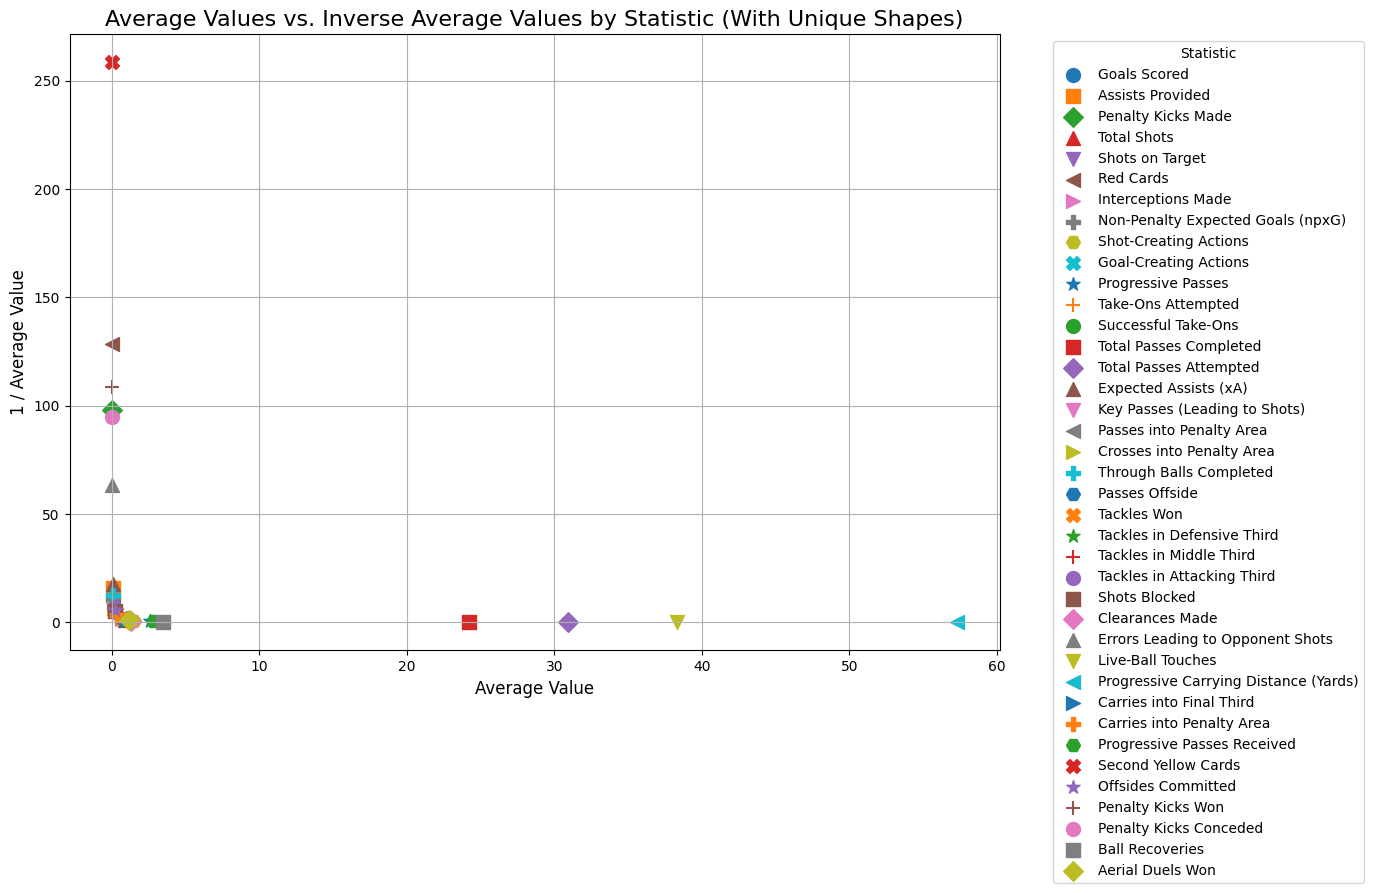

,Statistic,Average Value,Inverse Average Value,Marker
0,Goals Scored,0.098636,10.138306,o
1,Assists Provided,0.063803,15.673179,s
2,Penalty Kicks Made,0.010229,97.759237,D
3,Total Shots,0.885140,1.129765,^
4,Shots on Target,0.299414,3.339854,v
5,Red Cards,0.007779,128.544233,<
6,Interceptions Made,0.669448,1.493768,>
7,Non-Penalty Expected Goals (npxG),0.091171,10.968357,P
8,Shot-Creating Actions,1.486612,0.672671,H
9,Goal-Creating Actions,0.157047,6.367508,X


In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Example dictionary (your dataset will have more stats)
data = medias

# Step 1: Compute average values for each statistic
averaged_data = []
for stat, roles in data.items():
    avg_value = sum(roles.values()) / len(roles)  # Compute mean across def, mid, and off
    inverse_avg_value = 1 / avg_value  # Compute 1/average value
    averaged_data.append({'Statistic': stat, 'Average Value': avg_value, 'Inverse Average Value': inverse_avg_value})

# Convert to DataFrame for easier handling
df_avg = pd.DataFrame(averaged_data)

# Step 2: Define unique markers for each statistic
# Generating a list of marker styles, using itertools to repeat if necessary
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'H', 'X', '*', '+']
# Ensure we have enough markers for any size dataset
expanded_marker_styles = list(itertools.islice(itertools.cycle(marker_styles), len(df_avg)))

# Assign markers to DataFrame
df_avg['Marker'] = expanded_marker_styles


# Step 3: Plot each statistic with its unique marker
plt.figure(figsize=(12, 8))
for _, row in df_avg.iterrows():
    plt.scatter(
        row['Average Value'], 
        row['Inverse Average Value'], 
        label=row['Statistic'], 
        marker=row['Marker'],  # Use unique marker
        s=100  # Size of points
    )

# Add labels and legend
plt.title("Average Values vs. Inverse Average Values by Statistic (With Unique Shapes)", fontsize=16)
plt.xlabel("Average Value", fontsize=12)
plt.ylabel("1 / Average Value", fontsize=12)
plt.legend(title="Statistic", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(True)

# Show the plot
plt.show()

df_avg

In [ ]:
pca_pca = new[new['Group']=='off']
pca_pca = pca_pca.iloc[20:25, :-1]
pca_pca['SofaScore'] = [7.5, 9, 5.8, 8, 2.1]

pca_pca

,Minutes Played,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,...,Carries into Final Third,Carries into Penalty Area,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,SofaScore
76,17,0,0,0,2,0,0,0,0.2,1,...,0,0,3,0,0,0,0,0,3,7.5
80,27,1,0,0,1,1,0,0,0.3,0,...,0,0,2,0,0,0,0,0,1,9.0
82,63,0,0,0,2,0,0,0,0.3,0,...,0,0,1,0,1,0,0,1,5,5.8
97,90,1,0,1,0,0,0,0,0.0,3,...,0,0,3,0,0,0,0,1,0,8.0
99,63,0,0,0,0,0,0,0,0.0,0,...,0,0,3,0,1,0,0,3,3,2.1


Explained variance by each component: [0.54055849 0.24576348]


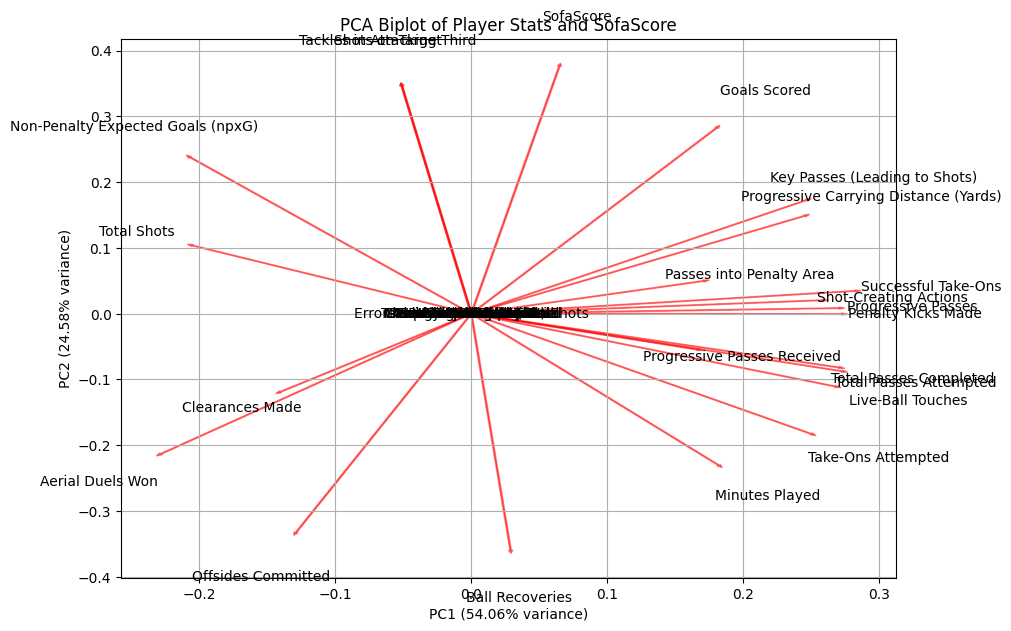

In [151]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: player stats + SofaScore match scores
data = {
    "Goals Scored": [0.1, 0.0, 0.2, 0.1, 0.0],
    "Assists Provided": [0.0, 0.1, 0.4, 0.1, 0.0],
    "Shots on Target": [0.3, 0.4, 0.5, 0.3, 0.2],
    "Key Passes": [0.6, 0.7, 0.5, 0.4, 0.3],
    "Carries into Penalty Area": [0.2, 0.3, 0.1, 0.2, 0.1],
    "SofaScore": [7.8, 3.5, 8.0, 9.3, 4.8]
}
df = pd.DataFrame(data)
df = pca_pca

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)  # Limit to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["SofaScore"] = df["SofaScore"]  # Add SofaScore back for reference

# Variance explained by components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")

# Plot the biplot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=df["SofaScore"], palette="viridis", s=100)

# Add feature vectors (loadings)
loading_vectors = pca.components_.T
features = df.columns
for i, feature in enumerate(features):
    plt.arrow(0, 0, loading_vectors[i, 0], loading_vectors[i, 1], color="r", alpha=0.5)
    plt.text(loading_vectors[i, 0] * 1.2, loading_vectors[i, 1] * 1.2, feature, color="black", ha="center", va="center")

plt.title("PCA Biplot of Player Stats and SofaScore")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}% variance)")
plt.grid()
plt.show()


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example data (replace with your actual dataset)


# Separate independent variables (X) and dependent variable (y)
X = df.drop(columns=["SofaScore"])
y = df["SofaScore"]

# Standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get coefficients
coefficients = model.coef_
stat_contributions = pd.DataFrame({
    "Statistic": X.columns,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print(stat_contributions)

                                Statistic   Coefficient
8       Non-Penalty Expected Goals (npxG)  3.815850e-01
4                             Total Shots  3.620380e-01
18               Passes into Penalty Area  2.979616e-01
1                            Goals Scored  2.885478e-01
17          Key Passes (Leading to Shots)  2.621626e-01
9                   Shot-Creating Actions  2.424244e-01
11                     Progressive Passes  2.039119e-01
5                         Shots on Target  1.824697e-01
25             Tackles in Attacking Third  1.824697e-01
3                      Penalty Kicks Made  1.709278e-01
30  Progressive Carrying Distance (Yards)  1.367412e-01
27                        Clearances Made  1.195368e-01
13                    Successful Take-Ons  1.159621e-01
14                 Total Passes Completed  3.308967e-02
2                        Assists Provided  1.387779e-16
6                               Red Cards  0.000000e+00
37                 Penalty Kicks Conceded  0.000

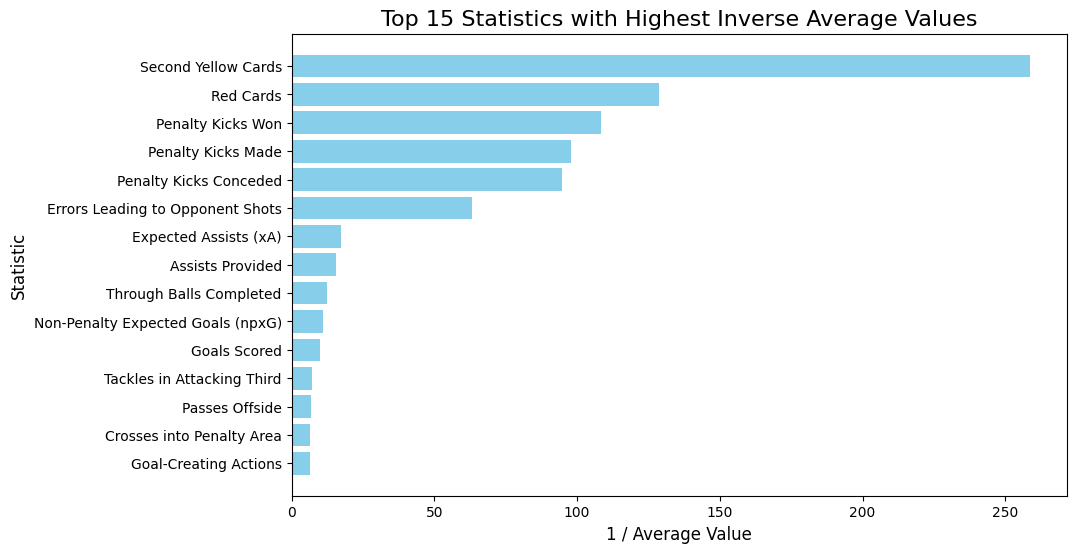

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

# Original dictionary (replace with your full dataset)
data = medias

# Step 1: Compute average values and inverse values for each statistic
averaged_data = []
for stat, roles in data.items():
    avg_value = sum(roles.values()) / len(roles)  # Compute mean across def, mid, and off
    inverse_avg_value = 1 / avg_value  # Compute 1/average value
    averaged_data.append({'Statistic': stat, 'Inverse Average Value': inverse_avg_value})

# Convert to DataFrame for easier handling
df_avg = pd.DataFrame(averaged_data)

# Step 2: Sort the DataFrame by inverse average value in descending order
df_sorted = df_avg.sort_values(by='Inverse Average Value', ascending=False)

# Step 3: Select the top 15 statistics based on inverse average value
df_top_15 = df_sorted.head(15)

# Step 4: Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top_15['Statistic'], df_top_15['Inverse Average Value'], color='skyblue')
plt.xlabel('1 / Average Value', fontsize=12)
plt.ylabel('Statistic', fontsize=12)
plt.title('Top 15 Statistics with Highest Inverse Average Values', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest bar on top
plt.show()


In [154]:
import math

def combine_dicts(d1, d2, d3):
    result = {}
    for key in d1:
        if isinstance(d1[key], dict) and isinstance(d2[key], dict) and isinstance(d3[key], dict):
            # Recursive call for nested dictionaries
            result[key] = combine_dicts(d1[key], d2[key], d3[key])
        else:
            # Perform (d1 / d2) * d3 directly
            if d2[key] != 0:  # Check to avoid division by zero
                result[key] = ((1 - d2[key]) / d1[key] ) * d3[key]
            else:
                result[key] = None  # Handle division by zero gracefully
    return result

result = combine_dicts(std, medias, w)

result

{'Goals Scored': {'def': 0.08098475711575807,
  'mid': 0.08310261869048194,
  'off': 0.06664002089542029},
 'Assists Provided': {'def': 0.13686260388587163,
  'mid': 0.12599361599901335,
  'off': 0.12124296113412657},
 'Penalty Kicks Made': {'def': 0.49949853195232896,
  'mid': 0.1329655696526208,
  'off': 0.08298530379293416},
 'Total Shots': {'def': 0.011602972545871311,
  'mid': 0.004656459475603803,
  'off': -0.01066115669728577},
 'Shots on Target': {'def': 0.036987233289853906,
  'mid': 0.03414827025301568,
  'off': 0.021925906707897656},
 'Red Cards': {'def': 0.1409246020728459,
  'mid': 0.14375290603786917,
  'off': 0.1790425128343483},
 'Interceptions Made': {'def': -0.003218868531590406,
  'mid': 0.004070888940058089,
  'off': 0.017071064621945176},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.15254498126058466,
  'mid': 0.15745644230833783,
  'off': 0.11428436611026858},
 'Shot-Creating Actions': {'def': -0.0012096893544783836,
  'mid': -0.013657073380276703,
  'off': -0.

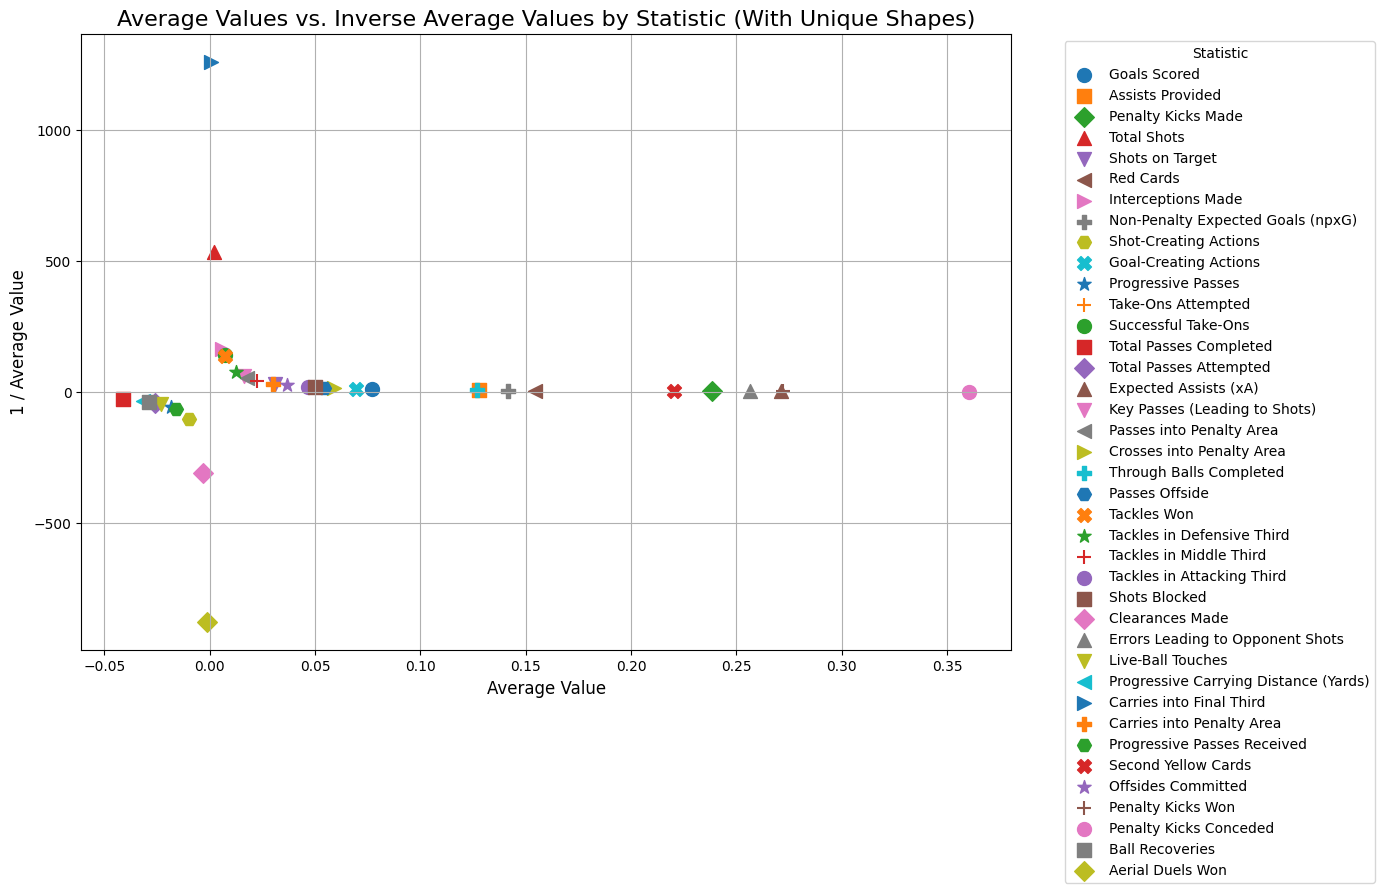

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools

# Example dictionary (your dataset will have more stats)
data = result

# Step 1: Compute average values for each statistic
averaged_data = []
for stat, roles in data.items():
    avg_value = sum(roles.values()) / len(roles)  # Compute mean across def, mid, and off
    inverse_avg_value = 1 / avg_value  # Compute 1/average value
    averaged_data.append({'Statistic': stat, 'Average Value': avg_value, 'Inverse Average Value': inverse_avg_value})

# Convert to DataFrame for easier handling
df_avg = pd.DataFrame(averaged_data)

# Step 2: Define unique markers for each statistic
# Generating a list of marker styles, using itertools to repeat if necessary
marker_styles = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'H', 'X', '*', '+']
# Ensure we have enough markers for any size dataset
expanded_marker_styles = list(itertools.islice(itertools.cycle(marker_styles), len(df_avg)))

# Assign markers to DataFrame
df_avg['Marker'] = expanded_marker_styles

# Step 3: Plot each statistic with its unique marker
plt.figure(figsize=(12, 8))
for _, row in df_avg.iterrows():
    plt.scatter(
        row['Average Value'], 
        row['Inverse Average Value'], 
        label=row['Statistic'], 
        marker=row['Marker'],  # Use unique marker
        s=100  # Size of points
    )

# Add labels and legend
plt.title("Average Values vs. Inverse Average Values by Statistic (With Unique Shapes)", fontsize=16)
plt.xlabel("Average Value", fontsize=12)
plt.ylabel("1 / Average Value", fontsize=12)
plt.legend(title="Statistic", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid(True)

# Show the plot
plt.show()

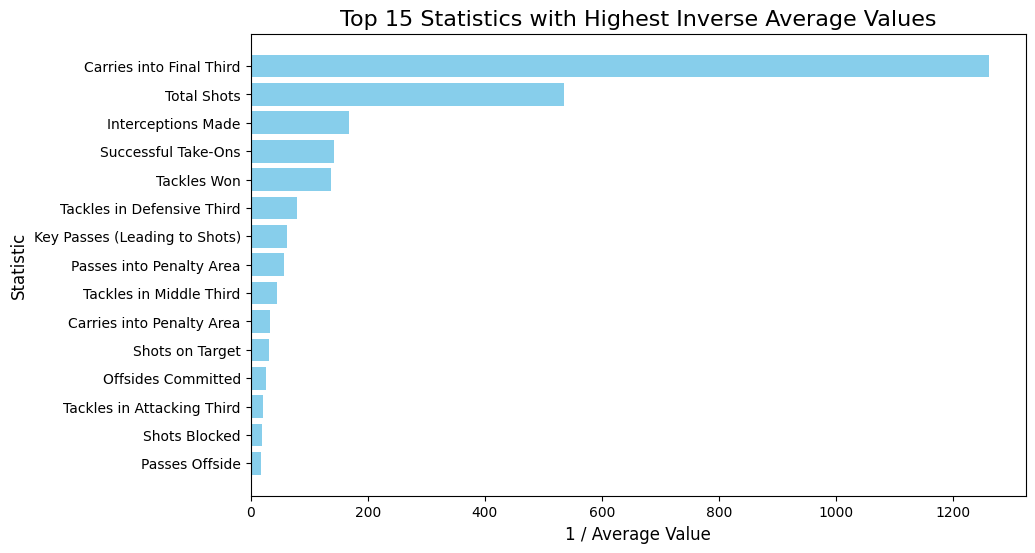

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Original dictionary (replace with your full dataset)
data = result

# Step 1: Compute average values and inverse values for each statistic
averaged_data = []
for stat, roles in data.items():
    avg_value = sum(roles.values()) / len(roles)  # Compute mean across def, mid, and off
    inverse_avg_value = 1 / avg_value  # Compute 1/average value
    averaged_data.append({'Statistic': stat, 'Inverse Average Value': inverse_avg_value})

# Convert to DataFrame for easier handling
df_avg = pd.DataFrame(averaged_data)

# Step 2: Sort the DataFrame by inverse average value in descending order
df_sorted = df_avg.sort_values(by='Inverse Average Value', ascending=False)

# Step 3: Select the top 15 statistics based on inverse average value
df_top_15 = df_sorted.head(15)

# Step 4: Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_top_15['Statistic'], df_top_15['Inverse Average Value'], color='skyblue')
plt.xlabel('1 / Average Value', fontsize=12)
plt.ylabel('Statistic', fontsize=12)
plt.title('Top 15 Statistics with Highest Inverse Average Values', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest bar on top
plt.show()

In [157]:
import pandas as pd

# Function to convert dictionary to a DataFrame
def dict_to_df(data_dict, df_name):
    df = pd.DataFrame(data_dict).T  # Transpose so stats are in rows
    df['Stat'] = df.index  # Add 'Stat' column for easy identification
    df = df.reset_index(drop=True)  # Reset index
    df['Dataset'] = df_name  # Add a column to identify the dataset (firstdf, seconddf, thirddf)
    return df

# Convert all three dictionaries into DataFrames
df1 = dict_to_df(medias, 'medias')
df2 = dict_to_df(std, 'std')
df3 = dict_to_df(result, 'z-score')

# Concatenate the DataFrames into one DataFrame
final_df = pd.concat([df1, df2, df3], axis=0)

# Reshape the DataFrame to long format (Stat, Position, firstdf, seconddf, thirddf)
final_df = final_df.melt(id_vars=['Stat', 'Dataset'], var_name='Position', value_name='Value')

# Pivot the DataFrame to get columns: Stat, Position, firstdf, seconddf, thirddf
final_df_pivot = final_df.pivot_table(index=['Stat', 'Position'], columns='Dataset', values='Value', aggfunc='first')

# Reset the index for cleaner view
final_df_pivot.reset_index(inplace=True)

# Print the final DataFrame
final_df_pivot[['Stat', 'medias', 'std', 'z-score']].groupby('Stat').mean().reset_index().sort_values(by='z-score', ascending=False)

Dataset,Stat,medias,std,z-score
18,Penalty Kicks Conceded,0.010574,0.094760,0.360338
20,Penalty Kicks Won,0.009227,0.092508,0.272075
8,Expected Assists (xA),0.057177,0.121696,0.270965
7,Errors Leading to Opponent Shots,0.015839,0.118935,0.256668
19,Penalty Kicks Made,0.010229,0.090648,0.238483
25,Second Yellow Cards,0.003868,0.061353,0.220450
24,Red Cards,0.007779,0.086735,0.154573
14,Non-Penalty Expected Goals (npxG),0.091171,0.172237,0.141429
1,Assists Provided,0.063803,0.257023,0.128033
35,Through Balls Completed,0.080826,0.304963,0.127065


In [158]:
weights = {
    "Goals Scored": {
        "def": 0.1,
        "mid": 0.3,
        "off": 1.0
    },
    "Assists Provided": {
        "def": 0.2,
        "mid": 0.8,
        "off": 0.7
    },
    "Penalty Kicks Made": {
        "def": 0.1,
        "mid": 0.1,
        "off": 0.3
    },
    "Total Shots": {
        "def": 0.1,
        "mid": 0.5,
        "off": 0.9
    },
    "Shots on Target": {
        "def": 0.2,
        "mid": 0.6,
        "off": 0.8
    },
    "Red Cards": {
        "def": 0.5,
        "mid": 0.3,
        "off": 0.4
    },
    "Interceptions Made": {
        "def": 1.0,
        "mid": 0.6,
        "off": 0.2
    },
    "Non-Penalty Expected Goals (npxG)": {
        "def": 0.1,
        "mid": 0.5,
        "off": 1.0
    },
    "Shot-Creating Actions": {
        "def": 0.3,
        "mid": 0.8,
        "off": 1.0
    },
    "Goal-Creating Actions": {
        "def": 0.2,
        "mid": 0.8,
        "off": 1.0
    },
    "Progressive Passes": {
        "def": 0.3,
        "mid": 1.0,
        "off": 0.7
    },
    "Take-Ons Attempted": {
        "def": 0.1,
        "mid": 0.5,
        "off": 0.8
    },
    "Successful Take-Ons": {
        "def": 0.1,
        "mid": 0.4,
        "off": 0.7
    },
    "Total Passes Completed": {
        "def": 0.4,
        "mid": 1.0,
        "off": 0.5
    },
    "Total Passes Attempted": {
        "def": 0.3,
        "mid": 0.9,
        "off": 0.6
    },
    "Expected Assists (xA)": {
        "def": 0.2,
        "mid": 1.0,
        "off": 0.8
    },
    "Key Passes (Leading to Shots)": {
        "def": 0.3,
        "mid": 0.9,
        "off": 1.0
    },
    "Passes into Penalty Area": {
        "def": 0.2,
        "mid": 0.9,
        "off": 1.0
    },
    "Crosses into Penalty Area": {
        "def": 0.1,
        "mid": 0.6,
        "off": 0.8
    },
    "Through Balls Completed": {
        "def": 0.2,
        "mid": 0.9,
        "off": 0.9
    },
    "Passes Offside": {
        "def": 0.1,
        "mid": 0.3,
        "off": 0.6
    },
    "Tackles Won": {
        "def": 0.8,
        "mid": 0.6,
        "off": 0.3
    },
    "Tackles in Defensive Third": {
        "def": 1.0,
        "mid": 0.7,
        "off": 0.3
    },
    "Tackles in Middle Third": {
        "def": 0.7,
        "mid": 0.8,
        "off": 0.4
    },
    "Tackles in Attacking Third": {
        "def": 0.3,
        "mid": 0.6,
        "off": 0.5
    },
    "Shots Blocked": {
        "def": 0.9,
        "mid": 0.5,
        "off": 0.3
    },
    "Clearances Made": {
        "def": 1.0,
        "mid": 0.5,
        "off": 0.2
    },
    "Errors Leading to Opponent Shots": {
        "def": 1.0,
        "mid": 0.6,
        "off": 0.3
    },
    "Live-Ball Touches": {
        "def": 0.5,
        "mid": 0.8,
        "off": 0.7
    },
    "Progressive Carrying Distance (Yards)": {
        "def": 0.4,
        "mid": 0.8,
        "off": 1.0
    },
    "Carries into Final Third": {
        "def": 0.6,
        "mid": 0.9,
        "off": 1.0
    },
    "Carries into Penalty Area": {
        "def": 0.4,
        "mid": 0.8,
        "off": 1.0
    },
    "Progressive Passes Received": {
        "def": 0.4,
        "mid": 1.0,
        "off": 0.8
    },
    "Second Yellow Cards": {
        "def": 0.5,
        "mid": 0.4,
        "off": 0.3
    },
    "Offsides Committed": {
        "def": 0.2,
        "mid": 0.3,
        "off": 0.7
    },
    "Penalty Kicks Won": {
        "def": 0.1,
        "mid": 0.3,
        "off": 0.7
    },
    "Penalty Kicks Conceded": {
        "def": 0.4,
        "mid": 0.2,
        "off": 0.1
    },
    "Ball Recoveries": {
        "def": 1.0,
        "mid": 0.8,
        "off": 0.2
    },
    "Aerial Duels Won": {
        "def": 0.8,
        "mid": 0.5,
        "off": 0.3
    }
}

position_sums = {"def": 0, "mid": 0, "off": 0}

# Iterate over the weights dictionary and aggregate by position
for stat, pos_weights in weights.items():
    for position, weight in pos_weights.items():
        position_sums[position] += weight

position_sums

{'def': 16.099999999999998, 'mid': 24.800000000000004, 'off': 24.8}

In [159]:
# Define the points for each statistic and position (as per your provided dictionary)
points = {
    "Goals Scored": {"def": 10, "mid": 5, "off": 10},
    "Assists Provided": {"def": 3, "mid": 5, "off": 7},
    "Penalty Kicks Made": {"def": 3, "mid": 3, "off": 10},
    "Total Shots": {"def": 2, "mid": 5, "off": 8},
    "Shots on Target": {"def": 3, "mid": 6, "off": 10},
    "Red Cards": {"def": -5, "mid": -3, "off": -2},
    "Interceptions Made": {"def": 6, "mid": 3, "off": 1},
    "Non-Penalty Expected Goals (npxG)": {"def": 2, "mid": 5, "off": 10},
    "Shot-Creating Actions": {"def": 3, "mid": 8, "off": 12},
    "Goal-Creating Actions": {"def": 4, "mid": 8, "off": 12},
    "Progressive Passes": {"def": 1, "mid": 10, "off": 4},
    "Take-Ons Attempted": {"def": 0.5, "mid": 2, "off": 4},
    "Successful Take-Ons": {"def": 1, "mid": 3, "off": 5},
    "Total Passes Completed": {"def": 1, "mid": 4, "off": 2},
    "Total Passes Attempted": {"def": 0.5, "mid": 2, "off": 1},
    "Expected Assists (xA)": {"def": 1, "mid": 10, "off": 7},
    "Key Passes (Leading to Shots)": {"def": 3, "mid": 6, "off": 8},
    "Passes into Penalty Area": {"def": 2, "mid": 5, "off": 10},
    "Crosses into Penalty Area": {"def": 1, "mid": 3, "off": 7},
    "Through Balls Completed": {"def": 2, "mid": 5, "off": 10},
    "Passes Offside": {"def": -0.5, "mid": -1, "off": -2},
    "Tackles Won": {"def": 5, "mid": 3, "off": 1},
    "Tackles in Defensive Third": {"def": 6, "mid": 3, "off": 1},
    "Tackles in Middle Third": {"def": 5, "mid": 3, "off": 2},
    "Tackles in Attacking Third": {"def": 4, "mid": 2, "off": 1},
    "Shots Blocked": {"def": 3, "mid": 2, "off": 1},
    "Clearances Made": {"def": 4, "mid": 2, "off": 1},
    "Errors Leading to Opponent Shots": {"def": -2, "mid": -1, "off": -1},
    "Live-Ball Touches": {"def": 1, "mid": 2, "off": 3},
    "Progressive Carrying Distance (Yards)": {"def": 2, "mid": 3, "off": 5},
    "Carries into Final Third": {"def": 2, "mid": 3, "off": 6},
    "Carries into Penalty Area": {"def": 3, "mid": 4, "off": 8},
    "Progressive Passes Received": {"def": 2, "mid": 5, "off": 4},
    "Second Yellow Cards": {"def": -3, "mid": -2, "off": -1},
    "Offsides Committed": {"def": -1, "mid": -2, "off": -3},
    "Penalty Kicks Won": {"def": 3, "mid": 4, "off": 10},
    "Penalty Kicks Conceded": {"def": -2, "mid": -1, "off": -0.5},
    "Ball Recoveries": {"def": 5, "mid": 4, "off": 1},
    "Aerial Duels Won": {"def": 3, "mid": 2, "off": 1}
}

In [160]:
new = new.iloc[:, 1:]
new = new[new["Group"].notna()]

# medias = weights

def compute_score(row):
    score = 0
    for col in new.columns:
        if col == "Group":
            continue
        group = row["Group"]
        score += (row[col] / medias[col][group]) * w[col][group]
    return score

new["Score"] = new.apply(compute_score, axis=1)

In [161]:
mean_and_std = {
    "mean": {"def": new.groupby("Group")["Score"].mean().loc["def"], "mid": new.groupby("Group")["Score"].mean().loc["mid"], "off": new.groupby("Group")["Score"].mean().loc["off"]},
    "std deviations": {"def": new.groupby("Group")["Score"].std().loc["def"], "mid": new.groupby("Group")["Score"].std().loc["mid"], "off": new.groupby("Group")["Score"].std().loc["off"]},
}

def compute_normalized_score(row):
    score = row["Score"]
    group = row["Group"]
    normalized_score = (score / mean_and_std["mean"][group]) / mean_and_std["std deviations"][group]
    return normalized_score
new["Normalized Score"] = new.apply(compute_normalized_score, axis=1)

In [162]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score
0,0,0,0,3,0,0,0,0.1,3,0,...,9,0,0,0,0,5,1,off,1.274146,1.107449
1,0,0,0,0,0,0,0,0.0,1,0,...,4,0,0,0,0,1,1,def,0.463150,0.449959
3,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,0,0,1,0,mid,0.079545,0.082301
4,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,mid,0.284255,0.294104
5,0,0,0,2,0,0,1,0.4,3,0,...,0,0,0,0,0,7,2,mid,0.669820,0.693027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0,0,0,2,0,0,1,0.1,0,0,...,0,0,0,0,0,2,0,def,0.352138,0.342109
79171,0,0,0,1,0,0,0,0.0,4,0,...,3,0,0,0,0,3,0,off,0.714351,0.620892
79172,0,0,0,4,1,0,0,0.2,3,0,...,8,0,0,0,0,1,1,off,1.244531,1.081709
79173,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,mid,0.000000,0.000000


In [163]:
new[new['Score']==new['Score'].max()]

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Progressive Passes Received,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score
37801,1,0,1,1,0,0,0,0.0,5,1,...,14,0,1,1,0,6,0,def,22.891806,22.239824


In [167]:
names = laliga[laliga['Position']!='GK']['Player Name']

new['name player'] = names

In [168]:
new.groupby('name player')['Score'].sum().sort_values(ascending=False).head(40)

name player
Lionel Messi         500.904691
Daniel Parejo        440.277276
Iago Aspas           438.440488
Sergio Ramos         438.248706
Antoine Griezmann    395.669828
Karim Benzema        361.609029
Jordi Alba           356.049983
Vinicius Júnior      348.736155
Jesús Navas          347.359241
Toni Kroos           346.964096
Gerard Moreno        340.992723
Sergio Canales       335.464777
Luka Modrić          331.600613
Koke                 324.004068
José Luis Morales    320.684343
Iñaki Williams       319.662131
José Luis Gayà       316.602138
Mikel Merino         316.570990
Raúl García          313.201871
Mikel Oyarzabal      311.781685
Ángel Correa         298.089029
Lucas Vázquez        295.352495
Dani Carvajal        285.872288
Brais Méndez         285.480764
Nabil Fekir          279.828770
Iker Muniain         274.906620
Damián Suárez        271.822727
Lucas Ocampos        271.619383
Sergi Darder         270.236256
Portu                265.356276
Yannick Carrasco     264.082

In [169]:
new[(new['name player']=='Gerard Piqué')].sort_values(by='Score')

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Second Yellow Cards,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player
15470,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,0,def,0.026573,0.025816,Gerard Piqué
24123,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1,def,0.139902,0.135918,Gerard Piqué
14982,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,2,0,def,0.153392,0.149023,Gerard Piqué
28316,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,2,0,off,0.199909,0.173755,Gerard Piqué
75389,0,0,0,0,0,0,1,0.0,1,0,...,0,0,0,0,6,2,def,0.225983,0.219547,Gerard Piqué
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47713,0,0,0,0,0,0,0,0.0,1,0,...,0,0,0,1,8,7,def,3.016564,2.930649,Gerard Piqué
59372,1,0,0,1,1,0,1,0.1,1,0,...,0,0,0,0,14,4,def,3.774806,3.667295,Gerard Piqué
68971,0,0,0,2,0,0,0,0.2,1,0,...,0,0,1,0,9,0,def,4.238141,4.117434,Gerard Piqué
64554,0,0,0,0,0,0,1,0.0,2,1,...,0,0,1,0,8,5,def,4.783656,4.647413,Gerard Piqué


In [170]:
yy = new.groupby('Group')['Score'].sum()/new['Score'].sum()
yy

Group
def    0.349381
mid    0.384978
off    0.265640
Name: Score, dtype: float64

In [171]:
def modifi(x):
    if x['Group'] == 'off':
        return x['Score'] / yy.iloc[2]
    if x['Group'] == 'mid':
        return x['Score'] / yy.iloc[1]
    if x['Group'] == 'def':
        return x['Score'] / yy.iloc[0]

new['modified_score'] = new.apply(modifi, axis=1)

In [172]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
0,0,0,0,3,0,0,0,0.1,3,0,...,0,0,0,5,1,off,1.274146,1.107449,Adri Embarba,4.796507
1,0,0,0,0,0,0,0,0.0,1,0,...,0,0,0,1,1,def,0.463150,0.449959,Alejandro Pozo Pozo,1.325629
3,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,1,0,mid,0.079545,0.082301,Dion Lopy,0.206621
4,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.284255,0.294104,Gonzalo Melero,0.738367
5,0,0,0,2,0,0,1,0.4,3,0,...,0,0,0,7,2,mid,0.669820,0.693027,Iddrisu Baba,1.739891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0,0,0,2,0,0,1,0.1,0,0,...,0,0,0,2,0,def,0.352138,0.342109,Raúl Navas,1.007889
79171,0,0,0,1,0,0,0,0.0,4,0,...,0,0,0,3,0,off,0.714351,0.620892,Sergio Canales,2.689164
79172,0,0,0,4,1,0,0,0.2,3,0,...,0,0,0,1,1,off,1.244531,1.081709,Willian José,4.685022
79173,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.000000,0.000000,Xabi Prieto,0.000000


In [173]:
new.groupby('Group')['modified_score'].sum()/new['modified_score'].sum()

Group
def    0.333333
mid    0.333333
off    0.333333
Name: modified_score, dtype: float64

In [190]:
new.groupby('name player')['modified_score'].sum().sort_values(ascending=False).head(25)

name player
Lionel Messi         1819.302200
Iago Aspas           1633.886858
Antoine Griezmann    1413.816751
Karim Benzema        1360.942554
Vinicius Júnior      1272.349218
Sergio Ramos         1254.356046
Gerard Moreno        1242.471339
Iñaki Williams       1191.036271
Daniel Parejo        1143.642345
José Luis Morales    1053.529277
Jordi Alba           1033.597872
Jesús Navas          1024.400352
Mikel Oyarzabal      1023.441187
Sergio Canales        997.166410
Luis Suárez           968.050179
Lucas Ocampos         957.044559
Raúl García           951.220158
Ángel Correa          950.997990
Lucas Vázquez         914.476991
José Luis Gayà        904.307742
Toni Kroos            901.256674
Ousmane Dembélé       868.743809
Luka Modrić           863.231593
Koke                  844.711982
Mikel Merino          822.309053
Name: modified_score, dtype: float64

In [175]:
new[(new['name player']=='Lionel Messi')].sort_values(by='modified_score')

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
77548,0,0,0,1,0,0,0,0.0,1,0,...,0,0,0,1,0,off,0.510663,0.443853,Lionel Messi,1.922386
74598,0,1,0,0,0,0,0,0.0,2,1,...,0,0,0,0,0,off,1.045087,0.908358,Lionel Messi,3.934214
45336,0,0,0,3,1,0,0,0.2,4,0,...,0,0,0,4,0,off,1.067616,0.927939,Lionel Messi,4.019025
67298,0,0,0,2,1,0,0,0.1,3,0,...,0,0,0,0,0,off,1.139748,0.990634,Lionel Messi,4.290565
48330,0,0,0,2,1,0,0,0.1,5,0,...,0,0,0,1,0,mid,1.791123,1.853181,Lionel Messi,4.652533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49879,2,2,0,6,4,0,1,0.4,9,3,...,0,0,0,0,1,off,6.076078,5.281142,Lionel Messi,22.873314
64558,1,0,1,10,3,0,1,0.7,15,1,...,0,0,0,2,0,off,6.365925,5.533069,Lionel Messi,23.964442
58788,2,2,0,7,3,0,0,1.2,17,4,...,0,0,0,2,0,off,7.575932,6.584770,Lionel Messi,28.519497
46228,1,0,0,6,1,0,0,0.4,10,2,...,1,0,0,0,0,off,9.043507,7.860342,Lionel Messi,34.044164


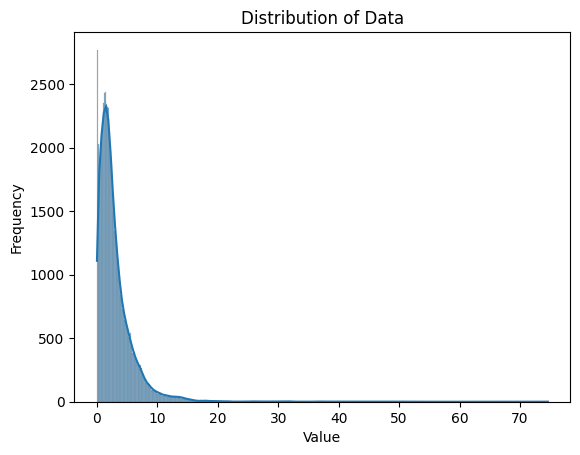

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

data = new['modified_score']

sns.histplot(data, kde=True)  # kde=True adds a Kernel Density Estimate line
plt.title("Distribution of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [177]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
0,0,0,0,3,0,0,0,0.1,3,0,...,0,0,0,5,1,off,1.274146,1.107449,Adri Embarba,4.796507
1,0,0,0,0,0,0,0,0.0,1,0,...,0,0,0,1,1,def,0.463150,0.449959,Alejandro Pozo Pozo,1.325629
3,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,1,0,mid,0.079545,0.082301,Dion Lopy,0.206621
4,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.284255,0.294104,Gonzalo Melero,0.738367
5,0,0,0,2,0,0,1,0.4,3,0,...,0,0,0,7,2,mid,0.669820,0.693027,Iddrisu Baba,1.739891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0,0,0,2,0,0,1,0.1,0,0,...,0,0,0,2,0,def,0.352138,0.342109,Raúl Navas,1.007889
79171,0,0,0,1,0,0,0,0.0,4,0,...,0,0,0,3,0,off,0.714351,0.620892,Sergio Canales,2.689164
79172,0,0,0,4,1,0,0,0.2,3,0,...,0,0,0,1,1,off,1.244531,1.081709,Willian José,4.685022
79173,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.000000,0.000000,Xabi Prieto,0.000000


***

In [178]:
laliga.loc[37801]

0
season_id                                             4
match_id                                             77
team_name                                       Sevilla
team_id                                               H
Player Name                               Lucas Ocampos
Shirt Number                                        5.0
Nationality                                      ar ARG
Position                                             RB
Age at Season Start                              26-119
Minutes Played                                       90
Goals Scored                                          1
Assists Provided                                      0
Penalty Kicks Made                                    1
Total Shots                                           1
Shots on Target                                       0
Red Cards                                             0
Interceptions Made                                    0
Non-Penalty Expected Goals (npxG)             

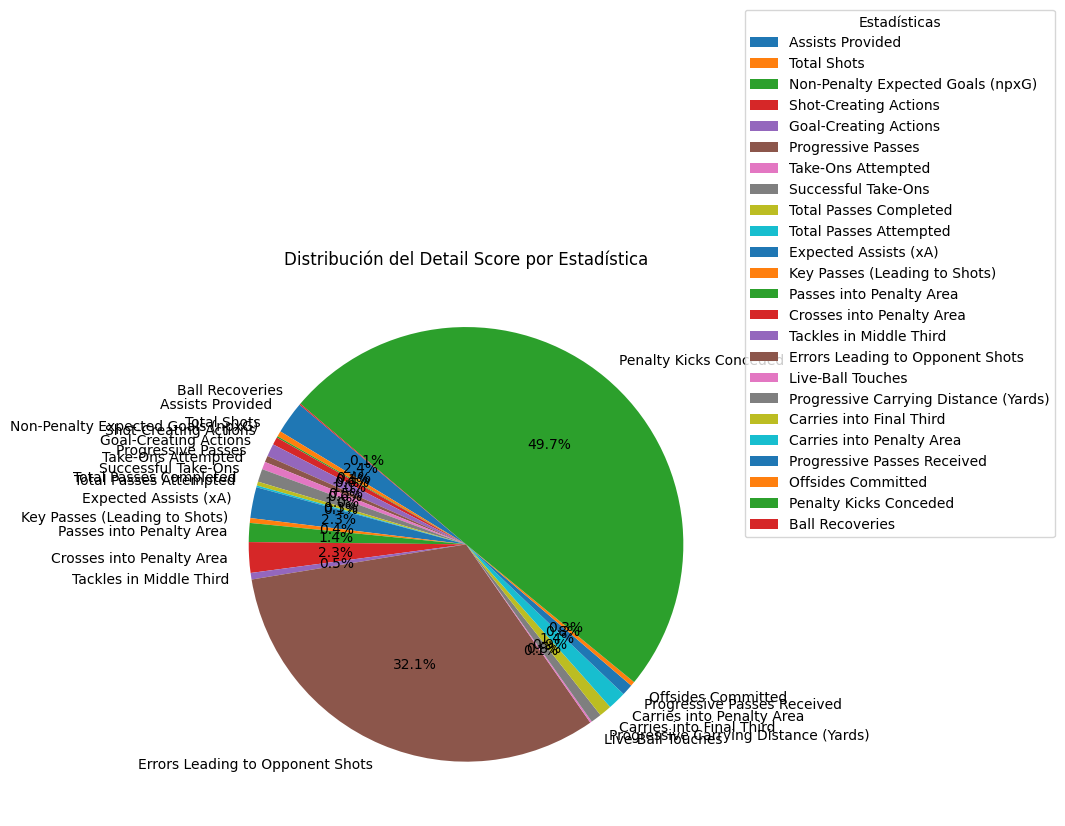

In [179]:
def detail_score(db, row):
    score = 0
    stats_scores = pd.DataFrame(columns=["Statistic", "Detail Score"])
    stats_scores = stats_scores.set_index("Statistic")

    for col in db.columns:
        if col in ["Group", "Score", "modified_score", "name player", "Normalized Score"]:
            continue
        group = row["Group"]
        score = (row[col] / medias[col][group]) * w[col][group]
        stats_scores.loc[col] = score
    return stats_scores

detail_score_for_max_score = detail_score(new,new.loc[8847])

import matplotlib.pyplot as plt

# Crear el pie chart
def plot_pie_chart(stats_scores):
    # Filtrar valores no cero
    stats_scores_filtered = stats_scores[stats_scores["Detail Score"] > 0]
    
    # Preparar datos para el gráfico
    labels = stats_scores_filtered.index  # Nombres de las estadísticas
    sizes = stats_scores_filtered["Detail Score"]  # Valores correspondientes
    
    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Distribución del Detail Score por Estadística")
    plt.legend(labels, title="Estadísticas", loc="best", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# Llamar la función con el dataframe resultante
plot_pie_chart(detail_score_for_max_score)


In [180]:
detail_score_for_max_score.sort_values("Detail Score",ascending=False)

,Detail Score
Statistic,
Penalty Kicks Conceded,9.856209
Errors Leading to Opponent Shots,6.362869
Assists Provided,0.478730
Expected Assists (xA),0.456382
Crosses into Penalty Area,0.450216
Passes into Penalty Area,0.278743
Carries into Penalty Area,0.269816
Successful Take-Ons,0.191286
Goal-Creating Actions,0.188594


In [181]:
medias

{'Goals Scored': {'def': 0.03191901954700589,
  'mid': 0.06969131674351484,
  'off': 0.1942970822281167},
 'Assists Provided': {'def': 0.042856034750232704,
  'mid': 0.06821301608531907,
  'off': 0.08034074678637013},
 'Penalty Kicks Made': {'def': 0.0008920260626745269,
  'mid': 0.007708282003449368,
  'off': 0.022087329116506835},
 'Total Shots': {'def': 0.43600682593856654,
  'mid': 0.7980711696174018,
  'off': 1.4213425831462967},
 'Shots on Target': {'def': 0.11801892646602544,
  'mid': 0.24599626905071978,
  'off': 0.5342277086308916},
 'Red Cards': {'def': 0.011092150170648464,
  'mid': 0.007145119847946218,
  'off': 0.005100999795960008},
 'Interceptions Made': {'def': 1.0871082842072604,
  'mid': 0.6707261272042518,
  'off': 0.250510099979596},
 'Non-Penalty Expected Goals (npxG)': {'def': 0.03321827489916227,
  'mid': 0.0635563690120024,
  'off': 0.17673944093042238},
 'Shot-Creating Actions': {'def': 1.054956562209122,
  'mid': 1.6928302418077505,
  'off': 1.7120485615180576

In [182]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
0,0,0,0,3,0,0,0,0.1,3,0,...,0,0,0,5,1,off,1.274146,1.107449,Adri Embarba,4.796507
1,0,0,0,0,0,0,0,0.0,1,0,...,0,0,0,1,1,def,0.463150,0.449959,Alejandro Pozo Pozo,1.325629
3,0,0,0,1,0,0,0,0.0,0,0,...,0,0,0,1,0,mid,0.079545,0.082301,Dion Lopy,0.206621
4,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.284255,0.294104,Gonzalo Melero,0.738367
5,0,0,0,2,0,0,1,0.4,3,0,...,0,0,0,7,2,mid,0.669820,0.693027,Iddrisu Baba,1.739891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0,0,0,2,0,0,1,0.1,0,0,...,0,0,0,2,0,def,0.352138,0.342109,Raúl Navas,1.007889
79171,0,0,0,1,0,0,0,0.0,4,0,...,0,0,0,3,0,off,0.714351,0.620892,Sergio Canales,2.689164
79172,0,0,0,4,1,0,0,0.2,3,0,...,0,0,0,1,1,off,1.244531,1.081709,Willian José,4.685022
79173,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,mid,0.000000,0.000000,Xabi Prieto,0.000000


In [183]:
def modify_dataframe(new, medias, w):
    # Determine the range of columns to modify (all before the 'Group' column)
    valid_columns = new.columns[:new.columns.get_loc("Group")]

    # Ensure that columns to be modified can hold arrays
    new[valid_columns] = new[valid_columns].astype(object)

    # Iterate through each row in the DataFrame
    for index, row in new.iterrows():
        group = row["Group"]  # Extract the group for the current row

        # Update each valid column
        for col in valid_columns:
            original_value = row[col]  # Get the original value
            # Calculate the transformed value
            transformed_value = (original_value / medias[col][group]) * w[col][group]
            # Update the cell with the array
            new.at[index, col] = [original_value, transformed_value]

    return new

# Example usage
modified_new = modify_dataframe(new, medias, w)


In [184]:
modified_new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
0,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[3, 0.08118001722652886]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.1, 0.02176171784807204]","[3, 0.06739564401275214]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[5, 0.029855237733219298]","[1, 0.011274597763024105]",off,1.274146,1.107449,Adri Embarba,4.796507
1,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.0, 0.0]","[1, 0.028295711252933523]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[1, 0.010202794926354477]","[1, 0.010305158014554476]",def,0.463150,0.449959,Alejandro Pozo Pozo,1.325629
3,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[1, 0.030561489790605766]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.0, 0.0]","[0, 0.0]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[1, 0.006232528529651072]","[0, 0.0]",mid,0.079545,0.082301,Dion Lopy,0.206621
4,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.0, 0.0]","[0, 0.0]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]",mid,0.284255,0.294104,Gonzalo Melero,0.738367
5,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[2, 0.06112297958121153]","[0, 0.0]","[0, 0.0]","[1, 0.018181969445639042]","[0.4, 0.15350306684658474]","[3, 0.06483585586453638]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[7, 0.043627699707557505]","[2, 0.02940595032939508]",mid,0.669820,0.693027,Iddrisu Baba,1.739891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[2, 0.06846394251832813]","[0, 0.0]","[0, 0.0]","[1, 0.04118827908264599]","[0.1, 0.0449312108459454]","[0, 0.0]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[2, 0.020405589852708954]","[0, 0.0]",def,0.352138,0.342109,Raúl Navas,1.007889
79171,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[1, 0.027060005742176287]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.0, 0.0]","[4, 0.08986085868366953]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[3, 0.017913142639931576]","[0, 0.0]",off,0.714351,0.620892,Sergio Canales,2.689164
79172,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[4, 0.10824002296870515]","[1, 0.07199465291702474]","[0, 0.0]","[0, 0.0]","[0.2, 0.04352343569614408]","[3, 0.06739564401275214]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[1, 0.005971047546643859]","[1, 0.011274597763024105]",off,1.244531,1.081709,Willian José,4.685022
79173,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0.0, 0.0]","[0, 0.0]","[0, 0.0]",...,"[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]","[0, 0.0]",mid,0.000000,0.000000,Xabi Prieto,0.000000


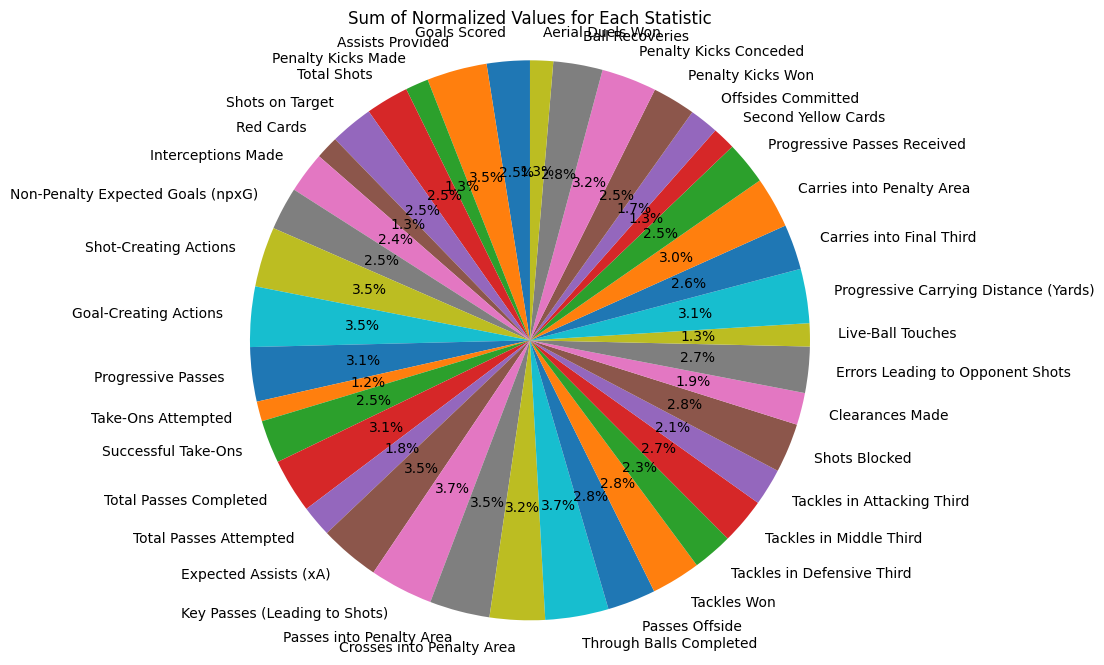

In [185]:
for col in modified_new.columns:
    # Skip the non-statistics columns like 'Group', 'Score', 'name player', etc.
    if col not in ['Group', 'Score', 'Normalized Score', 'name player', 'modified_score']:
        modified_new[col] = modified_new[col].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 0)

# 2. Sum the second values for each statistic (grouped by statistic)
# First, we need to remove the last few non-statistic columns if needed
stats_columns = [col for col in modified_new.columns if col not in ['Group', 'Score', 'Normalized Score', 'name player', 'modified_score']]

# Now, group by 'Statistic' and sum all the second values
grouped_sum = modified_new[stats_columns].sum()

plt.figure(figsize=(10, 8))  # Set the figure size for better readability
plt.pie(grouped_sum, labels=grouped_sum.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Sum of Normalized Values for Each Statistic")

# Show the plot
plt.show()

In [186]:
new

,Goals Scored,Assists Provided,Penalty Kicks Made,Total Shots,Shots on Target,Red Cards,Interceptions Made,Non-Penalty Expected Goals (npxG),Shot-Creating Actions,Goal-Creating Actions,...,Offsides Committed,Penalty Kicks Won,Penalty Kicks Conceded,Ball Recoveries,Aerial Duels Won,Group,Score,Normalized Score,name player,modified_score
0,0.0,0.0,0.0,0.081180,0.000000,0.0,0.000000,0.021762,0.067396,0.0,...,0.0,0.0,0.0,0.029855,0.011275,off,1.274146,1.107449,Adri Embarba,4.796507
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.028296,0.0,...,0.0,0.0,0.0,0.010203,0.010305,def,0.463150,0.449959,Alejandro Pozo Pozo,1.325629
3,0.0,0.0,0.0,0.030561,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.006233,0.000000,mid,0.079545,0.082301,Dion Lopy,0.206621
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,mid,0.284255,0.294104,Gonzalo Melero,0.738367
5,0.0,0.0,0.0,0.061123,0.000000,0.0,0.018182,0.153503,0.064836,0.0,...,0.0,0.0,0.0,0.043628,0.029406,mid,0.669820,0.693027,Iddrisu Baba,1.739891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79170,0.0,0.0,0.0,0.068464,0.000000,0.0,0.041188,0.044931,0.000000,0.0,...,0.0,0.0,0.0,0.020406,0.000000,def,0.352138,0.342109,Raúl Navas,1.007889
79171,0.0,0.0,0.0,0.027060,0.000000,0.0,0.000000,0.000000,0.089861,0.0,...,0.0,0.0,0.0,0.017913,0.000000,off,0.714351,0.620892,Sergio Canales,2.689164
79172,0.0,0.0,0.0,0.108240,0.071995,0.0,0.000000,0.043523,0.067396,0.0,...,0.0,0.0,0.0,0.005971,0.011275,off,1.244531,1.081709,Willian José,4.685022
79173,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,mid,0.000000,0.000000,Xabi Prieto,0.000000
